# Principal Component Analysis

## Aim
To use dimensionality reduction technique Principal Componenet Analysis

## Objective
To find the accuracy of model without PCA, comparing it with a model with PCA and finding which model performs better

## Dataset
Heart Disease Dataset

## Source
Kaggle

In [ ]:
# Importing required packages
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,plot_roc_curve,plot_confusion_matrix,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Attribute Information

# Age: age of the patient [years]
# Sex: sex of the patient [M: Male, F: Female]
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina,
#  NAP: Non-Anginal Pain, ASY: Asymptomatic]
# RestingBP: resting blood pressure [mm Hg]
# Cholesterol: serum cholesterol [mm/dl]
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
# RestingECG: resting electrocardiogram results [Normal: Normal,
#  ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),
#  LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
# HeartDisease: output class [1: heart disease, 0: Normal]


In [ ]:
# Importing the data set

data=pd.read_csv("/content/drive/MyDrive/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Find the number of unique values in each column dataset

data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
cols=['Sex', 'ChestPainType', 'FastingBS',
       'RestingECG', 'ExerciseAngina','ST_Slope',
       'HeartDisease']

In [ ]:
# Find the unique values in the categorical columns

for i in cols:
  print(i)
  print(data[i].value_counts(),"\n")

Sex
M    725
F    193
Name: Sex, dtype: int64 

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

FastingBS
0    704
1    214
Name: FastingBS, dtype: int64 

RestingECG
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

ExerciseAngina
N    547
Y    371
Name: ExerciseAngina, dtype: int64 

ST_Slope
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 

HeartDisease
1    508
0    410
Name: HeartDisease, dtype: int64 



In [ ]:
# Function to plot the graph of the categorical columns
# Pie chart to show the proportion of each values
# Count plot to show how much percent of each value is either Heart Disease or Normal

def count(i):
  plt.figure(figsize=(15,6))
  plt.title(i,fontsize=28)
  plt.subplot(1, 2, 1)
  plt.title(i)
  data[i].value_counts().plot(kind='pie',autopct='%.2f%%')
  plt.subplot(1, 2, 2)
  total=float(len(data))
  ax=sns.countplot(x=i,data=data,hue='HeartDisease')
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
  plt.legend(["Normal","Has Heart Disease"],loc='upper right')
  plt.show()

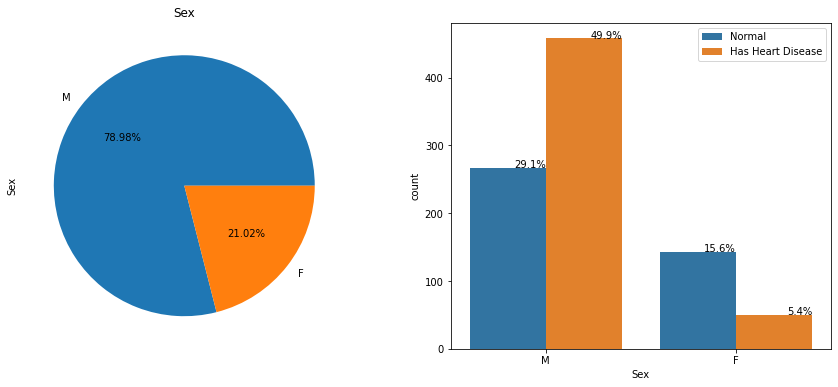

In [ ]:
count("Sex")

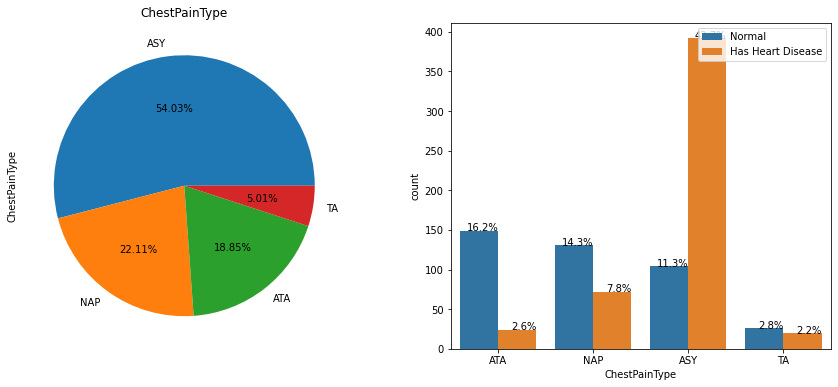

In [ ]:
count('ChestPainType')

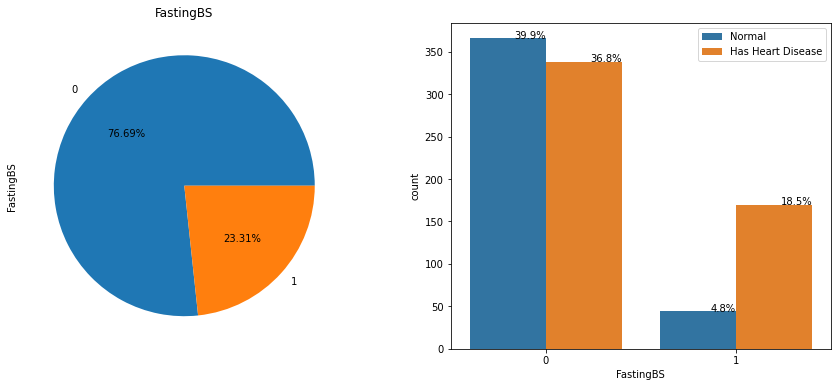

In [ ]:
count('FastingBS')

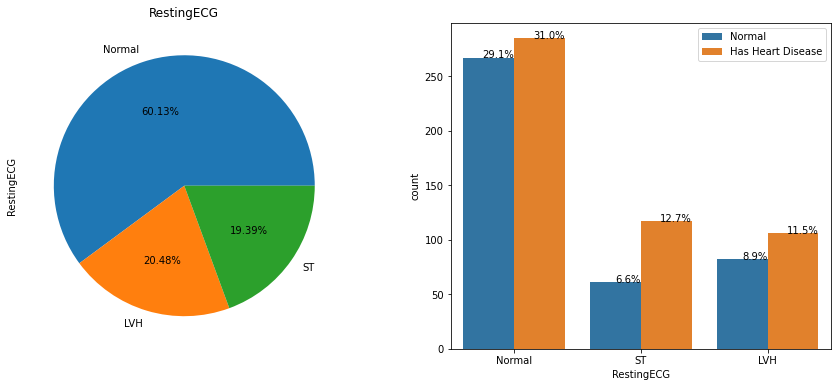

In [ ]:
count('RestingECG')

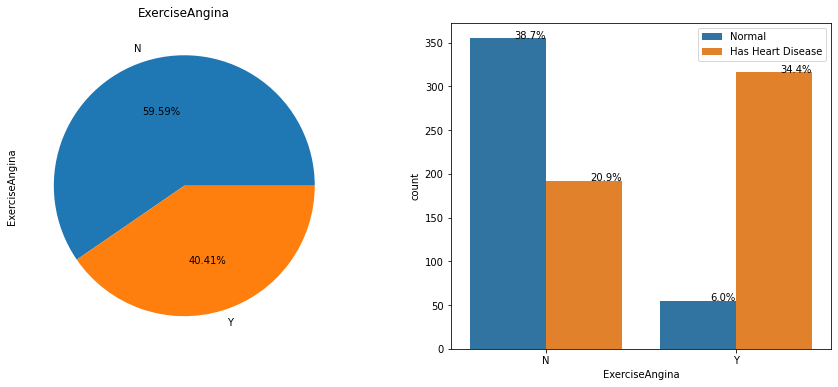

In [ ]:
count('ExerciseAngina')

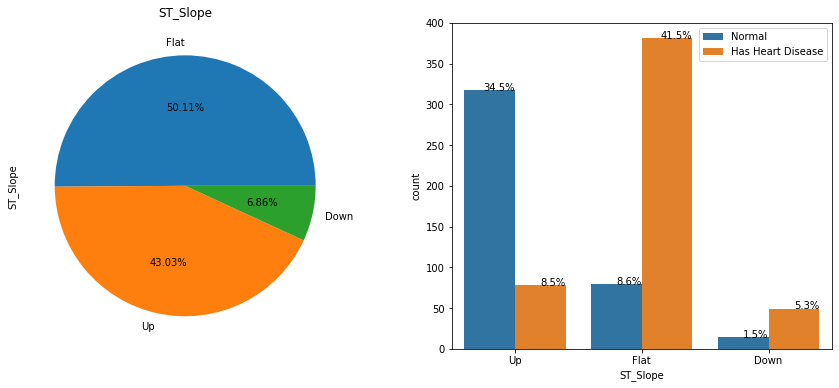

In [ ]:
count('ST_Slope')

In [ ]:
# Function to plot the numeric variables
# The distribution plot to show how the values of each column is distributed
# And a boxplot of each column to know the outliers

def dist(i):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.distplot(i)
  plt.subplot(1,2,2)
  sns.boxplot(i)
  plt.show()
  s=skew(i)
  print(round(s,5))
  if s>0:
    print("Left Tailed Distribution")
  elif s<0:
    print("Right Tailed Distribution ")
  else:
    print("Normal Distribution")


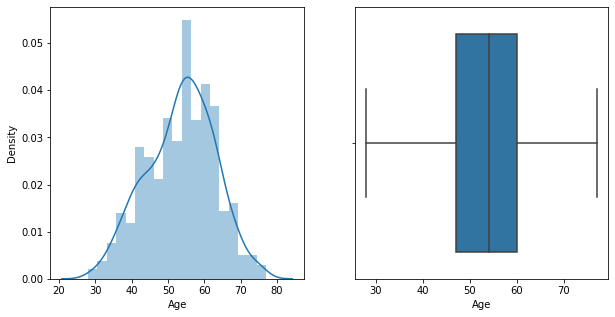

-0.19561
Right Tailed Distribution 


In [ ]:
dist(data["Age"])

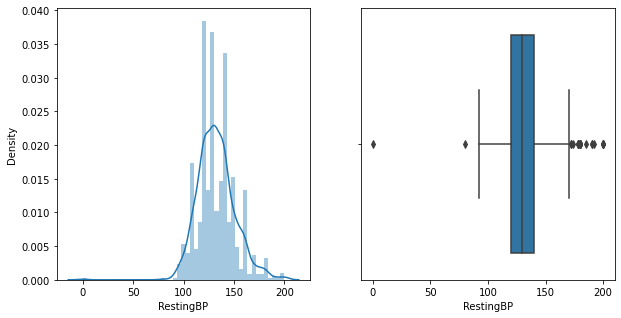

0.17955
Left Tailed Distribution


In [ ]:
dist(data["RestingBP"])

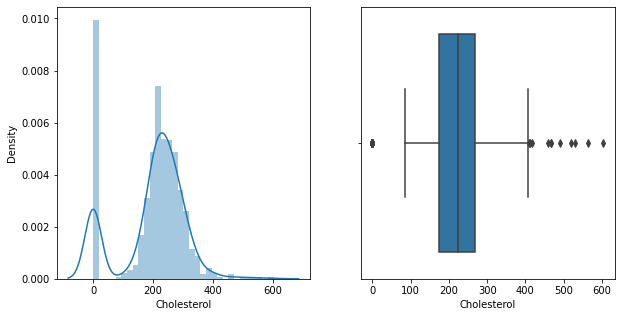

-0.60909
Right Tailed Distribution 


In [ ]:
dist(data["Cholesterol"])

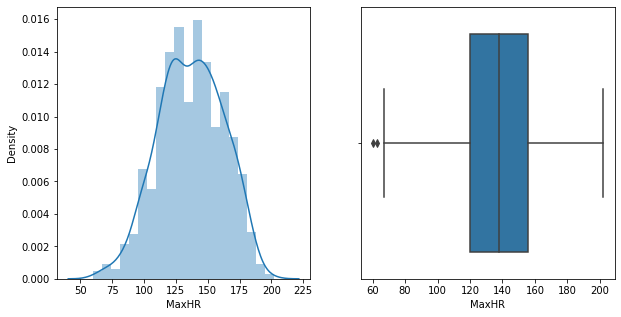

-0.14412
Right Tailed Distribution 


In [ ]:
dist(data["MaxHR"])

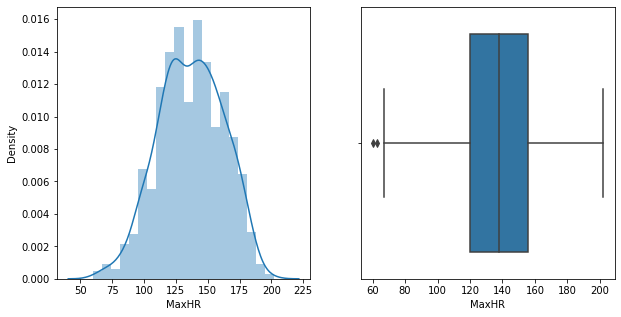

-0.14412
Right Tailed Distribution 


In [ ]:
dist(data["MaxHR"])

In [ ]:
# Funstion to know the 25th and 75th percentile of data to get the upper bound and
# lower bound

def quartile_deviation(data):
  import math
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  iqr = q3 - q1
  upper = math.floor(q3 + 1.5*iqr)
  lower = math.floor(q1 - 1.5*iqr)
  return upper,lower

In [ ]:
# Calculating the upper bound and lower bound using standard normalizer

def standard_normal(data):
  u=round(data.mean()+3*data.std(),2)
  l=round(data.mean()-3*data.std(),2)
  return u,l

In [ ]:
# Making a copy of original data

data_1=data.copy()

In [ ]:
# Function to remove outliers by capping

def remove_outlier(i,upper,lower):
  data_1[i]=np.where(data_1[i]>upper,upper,
            np.where(data_1[i]<lower,lower,
                     data_1[i]))
  sns.boxplot(data_1[i])
  plt.show()
  return

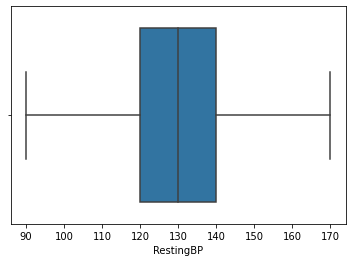

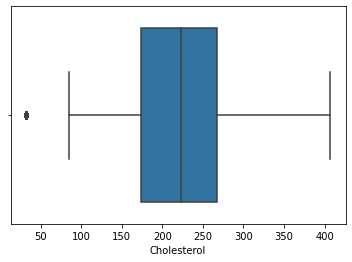

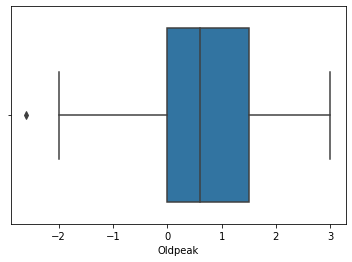

In [ ]:
# Removing all the outliers using interquartile range

col=['RestingBP', 'Cholesterol','Oldpeak']
for i in col:
  a,b=quartile_deviation(data[i])
  remove_outlier(i,a,b)


In [ ]:
a,b=standard_normal(data["MaxHR"])

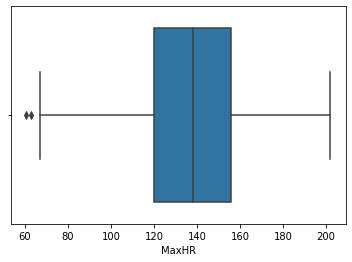

In [ ]:
remove_outlier("MaxHR",a,b)

In [ ]:
v=['Age','RestingBP', 'Cholesterol', 'MaxHR','Oldpeak']

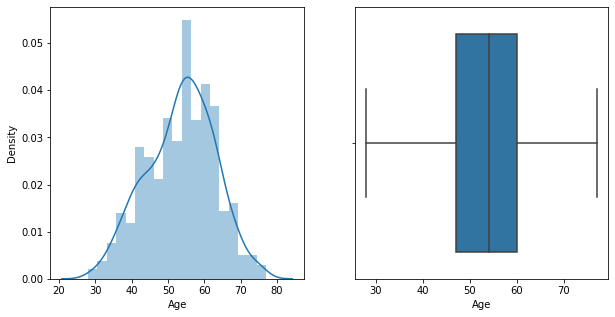

-0.19561
Right Tailed Distribution 


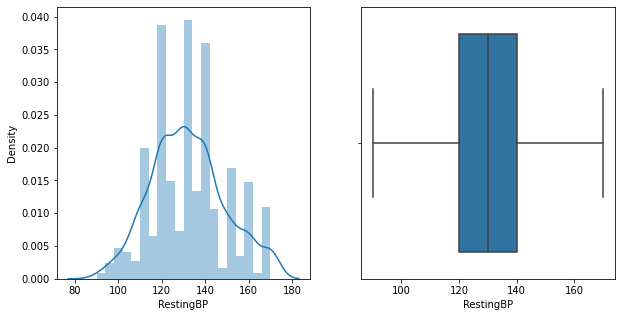

0.26765
Left Tailed Distribution


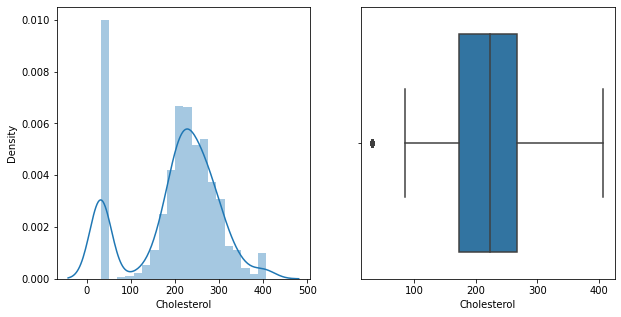

-0.61499
Right Tailed Distribution 


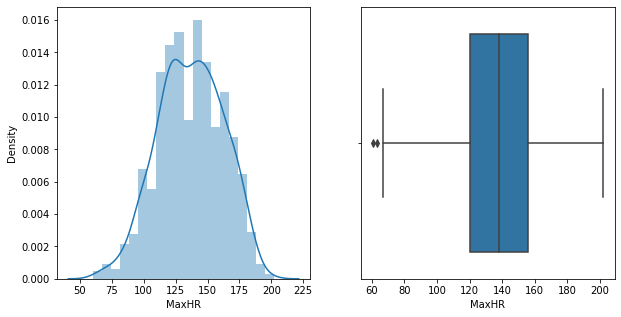

-0.1437
Right Tailed Distribution 


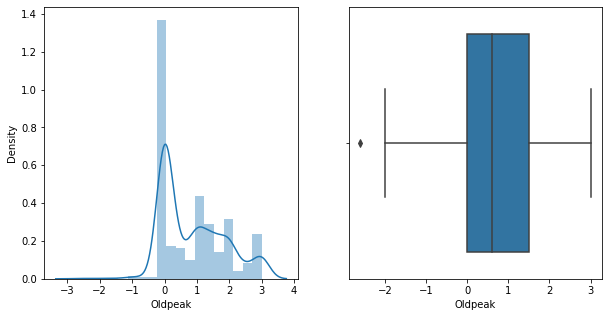

0.62213
Left Tailed Distribution


In [ ]:
for i in v:
  dist(data_1[i])

In [ ]:
data_1.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data_1.duplicated().sum()

0

In [ ]:
cat_cols=data_1.select_dtypes(include=['object']).columns

In [ ]:
for i in cat_cols:
  print(i,data_1[i].nunique())

Sex 2
ChestPainType 4
RestingECG 3
ExerciseAngina 2
ST_Slope 3


In [ ]:
cat_cols_encoded = []
for col in cat_cols:
    cat_cols_encoded += [f"{col}_{cat}" for cat in list(data_1[col].unique())]
print(cat_cols_encoded)

['Sex_M', 'Sex_F', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_ASY', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'RestingECG_LVH', 'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Up', 'ST_Slope_Flat', 'ST_Slope_Down']


In [ ]:
# Label Encoding the features with categorical value

label_encoder=preprocessing.LabelEncoder()
data_1["Sex"]=label_encoder.fit_transform(data_1["Sex"])
data_1["ChestPainType"]=label_encoder.fit_transform(data_1["ChestPainType"])
data_1["RestingECG"]=label_encoder.fit_transform(data_1["RestingECG"])
data_1["ExerciseAngina"]=label_encoder.fit_transform(data_1["ExerciseAngina"])
data_1["ST_Slope"]=label_encoder.fit_transform(data_1["ST_Slope"])
display(data_1.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172.0,0,0.0,2,0
1,49,0,2,160,180,0,1,156.0,0,1.0,1,1
2,37,1,1,130,283,0,2,98.0,0,0.0,2,0
3,48,0,0,138,214,0,1,108.0,1,1.5,1,1
4,54,1,2,150,195,0,1,122.0,0,0.0,2,0


In [ ]:
# One Hot encoding

enc=OneHotEncoder(sparse=False)
encoded_cols =enc.fit_transform(data_1[cat_cols])
data_enc = pd.DataFrame(encoded_cols, columns=cat_cols_encoded)
display(data_enc.head())

,Sex_M,Sex_F,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df1=data_1.join(data_enc)
df1=df1.drop(["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"],axis=1)
display(df1)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,Sex_F,ChestPainType_ATA,...,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,40,140,289,0,172.0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156.0,1.0,1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98.0,0.0,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,48,138,214,0,108.0,1.5,1,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,54,150,195,0,122.0,0.0,0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132.0,1.2,1,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141.0,3.0,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115.0,1.2,1,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
916,57,130,236,0,174.0,0.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Splitting the data into train and test data

X=df1.drop(["HeartDisease"],axis=1)
y=df1["HeartDisease"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
# Initializing the model

log_reg=LogisticRegression()

In [ ]:
# Fit the train data to the model

log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Predicting the test data

y_pred=log_reg.predict(X_test)

In [ ]:
# Evaluation Metrics : Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[ 86  18]
 [ 11 115]]


In [ ]:
# Accuracy of the model

print ("Accuracy : ", round(accuracy_score(y_test, y_pred)*100,2),"%")

Accuracy :  87.39 %


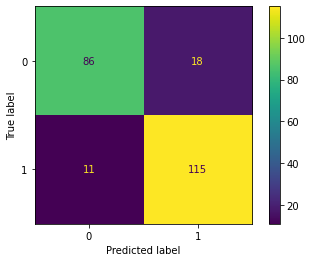

In [ ]:
# Plotting the confusion matrix

plot_confusion_matrix(log_reg,X_test,y_test)

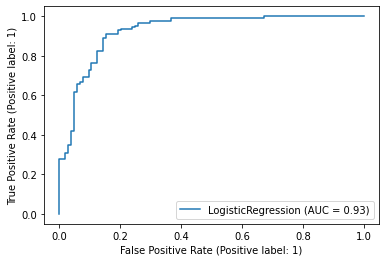

In [ ]:
# Plotting the ROC Curve

plot_roc_curve(log_reg, X_test, y_test)

In [ ]:
print("Classification Report\n",classification_report(y_test,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       104
           1       0.86      0.91      0.89       126

    accuracy                           0.87       230
   macro avg       0.88      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [ ]:
# Out of all the patients who the model predicted have heart disease 86% actually
# have the disease
# Out the patients who have disease the model correctly predicted for 91% of them
# The f1 score is close to 1 so the model does a pretty good job in classifying with
# and without disease
# We can see that among the 230 patients in test data set 104 donot have disease and
# 126 have disease.

In [ ]:
# PCA

pca=PCA(n_components=3)

In [ ]:
components=pca.fit_transform(X)

In [ ]:
df2=pd.DataFrame(data=components,columns=['PC_1','PC_2','PC_3'])
df2.head()

,PC_1,PC_2,PC_3
0,87.532501,-29.528124,10.533536
1,-21.962775,-15.542728,31.145339
2,76.500501,39.186788,-14.840431
3,8.377458,28.648213,-1.384025
4,-9.480706,17.162272,14.538385


In [ ]:
pca.explained_variance_ratio_

array([0.90380691, 0.06205901, 0.02712922])

In [ ]:
# From above we can see that Principal component 1 explains 90% variance of dataset
# and principal component explains  6% and principal component 3 explains 2% of
# variance

In [ ]:
df2.shape

(918, 3)

In [ ]:
df=pd.concat([df2,df1["HeartDisease"]],axis=1)
df.head()

,PC_1,PC_2,PC_3,HeartDisease
0,87.532501,-29.528124,10.533536,0
1,-21.962775,-15.542728,31.145339,1
2,76.500501,39.186788,-14.840431,0
3,8.377458,28.648213,-1.384025,1
4,-9.480706,17.162272,14.538385,0


In [ ]:
x=df.iloc[:,:-1]
y1=df["HeartDisease"]
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=0.20)

In [ ]:
log_reg1=LogisticRegression()

In [ ]:
log_reg1.fit(x_train,y1_train)

LogisticRegression()

In [ ]:
y1_pred=log_reg1.predict(x_test)

In [ ]:
print ("Accuracy : ", round(accuracy_score(y1_test, y1_pred)*100,2),"%")

Accuracy :  66.3 %


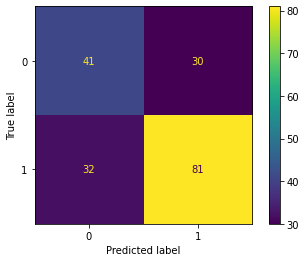

In [ ]:
# Plotting the confusion matrix

plot_confusion_matrix(log_reg1,x_test,y1_test)

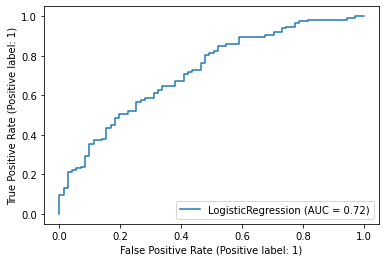

In [ ]:
plot_roc_curve(log_reg1, x_test, y1_test)

In [ ]:
# Based on our AUC 0.72 we can say that our model can predict the classes 0 and 1
# correctly.

In [ ]:
print("Classification Report\n",classification_report(y1_test,y1_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.56      0.58      0.57        71
           1       0.73      0.72      0.72       113

    accuracy                           0.66       184
   macro avg       0.65      0.65      0.65       184
weighted avg       0.66      0.66      0.66       184



In [ ]:
# Out of all the patients who the model predicted have heart disease 73% actually
# have the disease
# Out the patients who have disease the model correctly predicted for 72% of them
# The f1 score is close to 1 so the model does a pretty good job in classifying with
# and without disease
# We can see that among the 184 patients in test data set 71 donot have disease and
# 113 have disease.

In [ ]:
# Without PCA our model accuracy is 87.39% and with PCA our model accuracy is 66.3%
# And by comparing the classification report of both these classifiers we can say
# that our model without PCA predicts better than with PCA model